# 영상 분할 (Image Segmentation)

Semantic Segmentation은 컴퓨터 비전 분야에서 많이 연구되어온 분야입니다. 사진에서 물체 (Object)를 찾고 물체와 배경을 분리해내는 작업을 Semantic Segmentation이라고 합니다.

Semantic Segmentation은 Classification, Detection 과도 많은 연관이 있으며, 픽셀 단위의 예측을 수행하여 대상을 분리해냅니다.

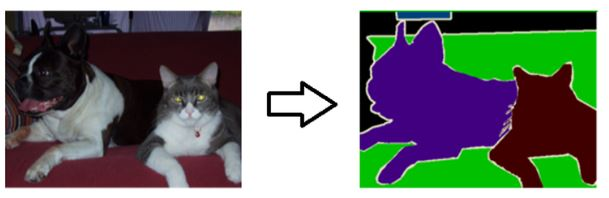

In [7]:
from IPython.display import Image
Image('./segmentation.JPG')

# FCN

FCN은 Fully Convolution Network의 약자로 CNN을 기반으로 이루어져 있습니다.

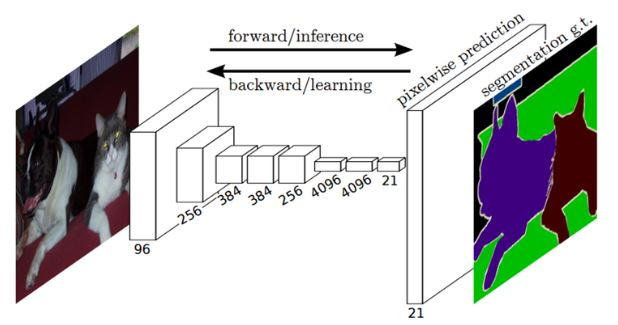

In [8]:
Image('./FCN.JPG')

기존의 CNN과 다른점은 모델의 뒤쪽에서 fully connected layer를 사용하지 않고 1 x 1 Convolution layer를 사용하여 Segmentation을 진행합니다.

그리고 모델의 마지막 단에서 Upsampling을 통해 줄어든 Feature map의 크기를 다시 키우는 작업을 수행합니다.

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, AveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model

# 임의의 이미지 Shape
image_shape = (256,256,3)

# 간단한 Segmetation Model입니다.
def Segmentation():
    shape = (256,256,3)
    inputs = Input(shape)
    
    '''
    지시시항 1번
    Segmentation의 결과 Shape가 임의의 이미지와 같아지도록
    모델을 구성하세요.
    
    '''
    
    # TODO : 4 층의 3 x 3 Convolution Layer를 쌓아보세요. (padding = 'same', strides = 2)
    conv1 = Conv2D(filters=16,kernel_size=3, padding='same', strides=2)(inputs)
    print(conv1)
    conv2 = Conv2D(filters=32,kernel_size=3, padding='same', strides=2)(conv1)
    conv3 = Conv2D(filters=64,kernel_size=3, padding='same', strides=2)(conv2)
    conv4 = Conv2D(filters=128,kernel_size=3, padding='same', strides=2)(conv3)
    
    # TODO : 3 층의 1 x 1 Convolution Layer를 쌓아보세요. (padding = 'same', strides = 1)
    conv5 = Conv2D(filters=64,kernel_size=1, padding='same', strides=1)(conv4)
    conv6 = Conv2D(filters=32,kernel_size=1, padding='same', strides=1)(conv5)
    conv7 = Conv2D(filters=3,kernel_size=1, padding='same', strides=1)(conv6)
    
    # TODO : Upsampling을 통해 image_shape와 같은 (256,256,3)의 output을 만들어보세요.
    upsampling = UpSampling2D((16,16), interpolation='nearest')(conv7)
    
    
    # 쌓은 Layer들을 모델로 만들어줍니다.
    model = Model(inputs = [inputs], outputs = [upsampling])
    
    return model
    
seg_model = Segmentation()
seg_model.summary()

# image_shape와 seg_model의 결과 Shape 비교
if image_shape == seg_model.layers[-1].output_shape[1:4]:
    print('Segmentation을 입력 이미지의 크기와 똑같이 복원해냈습니다.')
else:
    print('입력 이미지의 크기와 Model Output Shape이 다릅니다.')

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 16), dtype=tf.float32, name=None), name='conv2d_35/BiasAdd:0', description="created by layer 'conv2d_35'")
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)          